In [1]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hnmchallenge.dataset import Dataset
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN 

In [2]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.DEBUG)

In [3]:
dataset = FilterdDataset()
dr = DataReader()

In [4]:
fd = dr.get_filtered_full_data()

In [19]:
count = fd.groupby([DEFAULT_USER_COL, DEFAULT_ITEM_COL]).count()

In [20]:
# check which items have been bought multiple times
mb = count[count["price"]>1]

In [21]:
mb.head()

t_dat  price  sales_channel_id
customer_id article_id                                
0           0               3      3                 3
            1952            2      2                 2
1           339             2      2                 2
            3161            2      2                 2
            7534            2      2                 2

In [22]:
mb.reset_index()

,customer_id,article_id,t_dat,price,sales_channel_id
0,0,0,3,3,3
1,0,1952,2,2,2
2,1,339,2,2,2
3,1,3161,2,2,2
4,1,7534,2,2,2
...,...,...,...,...,...
1722026,1136177,338,3,3,3
1722027,1136181,3173,2,2,2
1722028,1136197,16477,2,2,2
1722029,1136201,17418,2,2,2


In [32]:
final_count = mb.reset_index().groupby(DEFAULT_ITEM_COL).sum()[["price"]].reset_index().rename(columns = {"price":"count"})

In [33]:
final_count = final_count.sort_values("count")

In [34]:
final_count.head()

,article_id,count
19775,22066,2
6717,6814,2
17701,18692,2
17699,18687,2
17691,18676,2


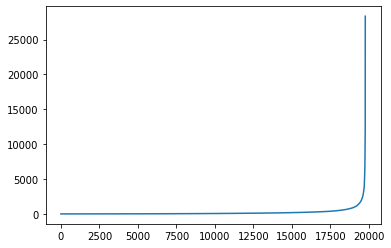

In [35]:
logging.basicConfig(level=logging.INFO)
y = final_count["count"].values
x = np.arange(len(y))
plt.plot(x,y)

In [46]:
final_count["count_cumsum"] = final_count["count"].cumsum(axis=0)
final_count["count_cumsum_norm"] = final_count["count_cumsum"]/final_count["count_cumsum"].max()

In [47]:
final_count.head()

,article_id,count,count_cumsum,count_cumsum_norm
19775,22066,2,2,5.030005e-07
6717,6814,2,4,1.006001e-06
17701,18692,2,6,1.509002e-06
17699,18687,2,8,2.012002e-06
17691,18676,2,10,2.515003e-06


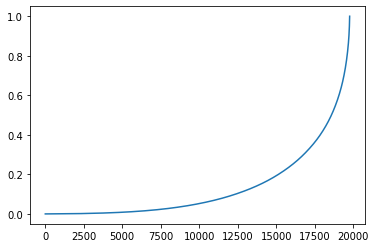

In [45]:
logging.basicConfig(level=logging.INFO)
y = final_count["count_cumsum_norm"].values
x = np.arange(len(y))
plt.plot(x,y)

In [54]:
len(final_count[final_count["count_cumsum_norm"]>0.05]["article_id"].unique())

9925

In [52]:
ccc.reset_index().rename(columns = {"price":"count"})

,article_id,count
0,0,146
1,1,23
2,3,363
3,4,369
4,5,314
...,...,...
81932,104529,2
81933,104535,2
81934,104538,2
81935,104540,2


In [22]:
len(ccc)

81937

In [42]:
ccc[ccc["price"]>1000]

,price
article_id,
22,1157
27,1097
52,3561
55,6370
65,1523
...,...
92968,1023
93808,1054
95200,1095


In [14]:
len(mb.reset_index()[DEFAULT_ITEM_COL].unique())

81937

In [ ]:
mb.head()

t_dat  price  sales_channel_id
customer_id article_id                                
0           0               2      2                 2
            2880            2      2                 2
            82209           2      2                 2
            89354           2      2                 2
1           1100            2      2                 2